Running Gradient Descent with Bisection Line Search:
Iteration 0: Loss = 9.932004013589152
Iteration 10: Loss = 2.3590935667002115e+17
Iteration 20: Loss = 5.653876568652993e+33
Iteration 30: Loss = 1.3550255362815597e+50
Iteration 40: Loss = 3.2474960881796685e+66
Iteration 50: Loss = 7.783049514832803e+82
Iteration 60: Loss = 1.8653097064789346e+99
Iteration 70: Loss = 4.470458904897865e+115
Iteration 80: Loss = 1.071404000684983e+132
Iteration 90: Loss = 2.5677599483715933e+148


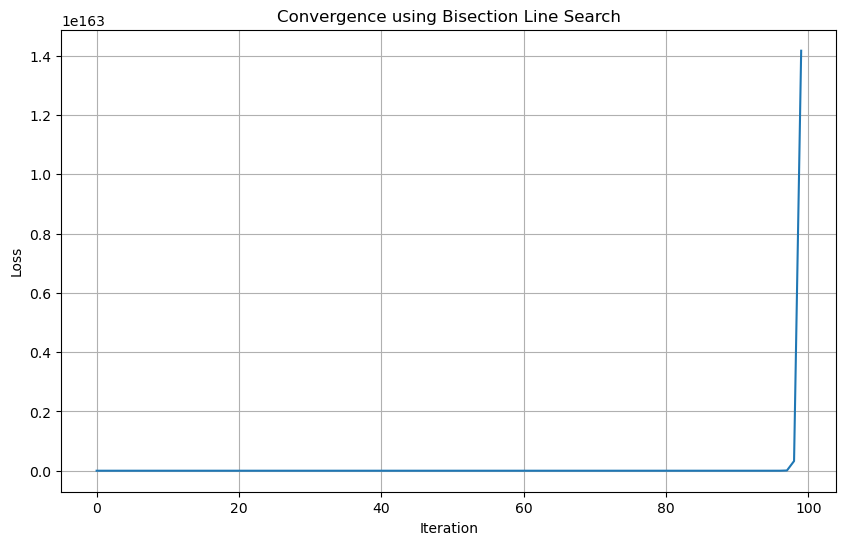

Running Gradient Descent with Golden Section Line Search:
Iteration 0: Loss = 0.08885408371615482
Iteration 10: Loss = 0.08818228021616534
Iteration 20: Loss = 0.08806962640675094
Iteration 30: Loss = 0.08803356961852633
Converged after 37 iterations.


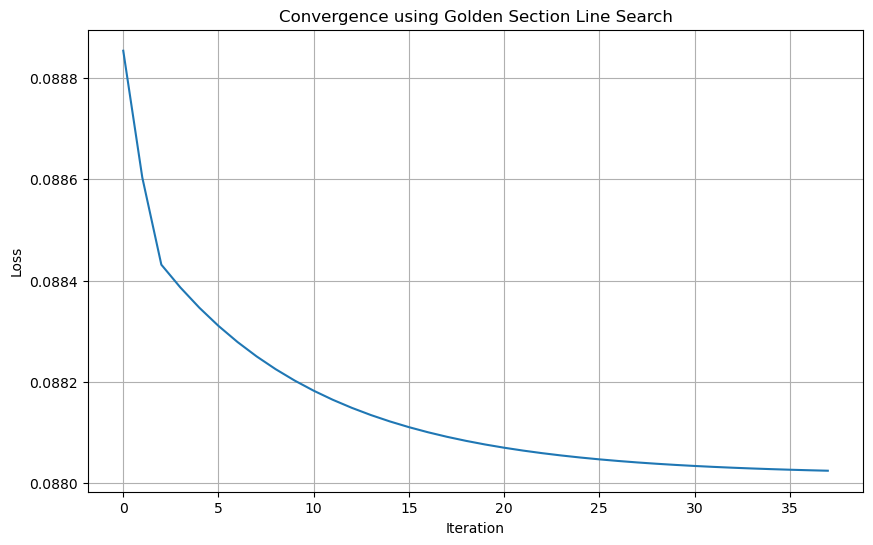

Running Gradient Descent with Armijo Rule Line Search:
Iteration 0: Loss = 0.27146360322810825
Iteration 10: Loss = 0.1095406322105407
Iteration 20: Loss = 0.0906254313954092
Iteration 30: Loss = 0.08836928425469762
Iteration 40: Loss = 0.08807971758330431
Iteration 50: Loss = 0.08803369082999649
Converged after 56 iterations.


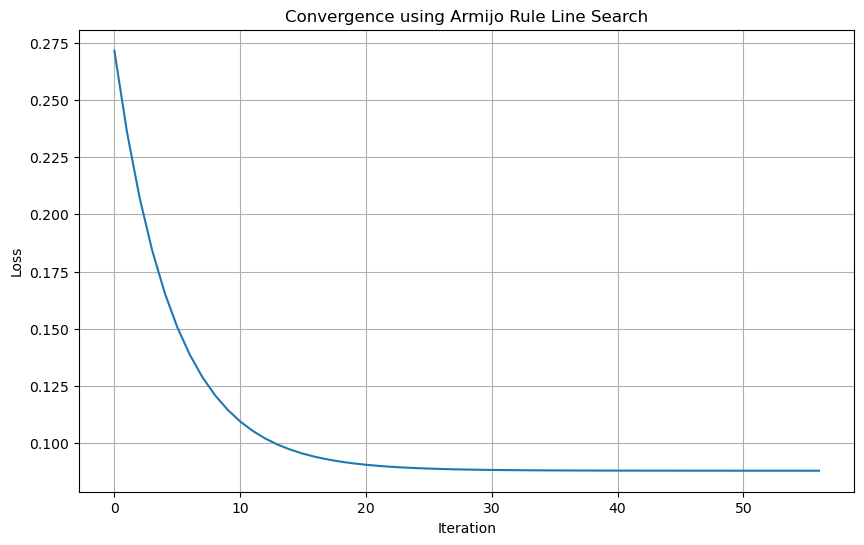

NameError: name 'bisection_optimization' is not defined

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(0)
num_samples = 1500
num_features = 15
X = np.random.rand(num_samples, num_features)
y = np.random.rand(num_samples, 1)

# Define the loss function and its gradient
def loss_function(theta, X, y):
    error = X.dot(theta) - y
    return np.mean(error**2)

def gradient(theta, X, y):
    error = X.dot(theta) - y
    gradient = 2 * X.T.dot(error) / len(y)
    return gradient

# Line search methods

def bisection_line_search(X, y, theta, gradient, max_iterations=100, tolerance=1e-6):
    a = 0.0
    b = 1.0
    for _ in range(max_iterations):
        alpha = (a + b) / 2
        new_theta = theta - alpha * gradient
        if loss_function(new_theta, X, y) < loss_function(theta, X, y) - alpha * np.linalg.norm(gradient) ** 2:
            b = alpha
        else:
            a = alpha
        if abs(b - a) < tolerance:
            break
    return (a + b) / 2

def golden_section_line_search(X, y, theta, gradient, max_iterations=100, tolerance=1e-6):
    a = 0.0
    b = 1.0
    phi = (1 + np.sqrt(5)) / 2  # Golden ratio
    for _ in range(max_iterations):
        alpha = a + (1 - 1/phi) * (b - a)
        beta = a + 1/phi * (b - a)
        new_theta_alpha = theta - alpha * gradient
        new_theta_beta = theta - beta * gradient
        if loss_function(new_theta_alpha, X, y) < loss_function(new_theta_beta, X, y):
            b = beta
        else:
            a = alpha
        if abs(b - a) < tolerance:
            break
    return (a + b) / 2

def armijo_line_search(X, y, theta, gradient, max_iterations=100, tolerance=1e-6):
    alpha = 1.0
    beta = 0.5
    c = 1e-4
    for _ in range(max_iterations):
        new_theta = theta - alpha * gradient
        if loss_function(new_theta, X, y) <= loss_function(theta, X, y) - c * alpha * np.linalg.norm(gradient) ** 2:
            break
        alpha *= beta
    return alpha

# Gradient Descent with Line Search
def gradient_descent_with_line_search(X, y, learning_rate_method, max_iterations=100, tolerance=1e-6):
    num_samples, num_features = X.shape
    theta = np.zeros((num_features, 1))
    losses = []
    
    for iteration in range(max_iterations):
        gradient_value = gradient(theta, X, y)
        learning_rate = learning_rate_method(X, y, theta, gradient_value)
        new_theta = theta - learning_rate * gradient_value
        loss = loss_function(new_theta, X, y)
        theta = new_theta
        losses.append(loss)
        
        if iteration % 10 == 0:
            print(f"Iteration {iteration}: Loss = {loss}")
        
        if len(losses) > 1 and abs(losses[-1] - losses[-2]) < tolerance:
            print(f"Converged after {iteration} iterations.")
            break
    
    return theta, losses

# Run gradient descent with different line search methods
methods = ["Bisection", "Golden Section", "Armijo Rule"]
for method in methods:
    print(f"Running Gradient Descent with {method} Line Search:")
    if method == "Bisection":
        theta, losses = gradient_descent_with_line_search(X, y, bisection_line_search)
    elif method == "Golden Section":
        theta, losses = gradient_descent_with_line_search(X, y, golden_section_line_search)
    elif method == "Armijo Rule":
        theta, losses = gradient_descent_with_line_search(X, y, armijo_line_search)
    
    # Plot the convergence
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(losses)), losses)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title(f'Convergence using {method} Line Search')
    plt.grid(True)
    plt.show()


In [6]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generate a synthetic dataset with 1500 rows and 15 columns
np.random.seed(0)
num_rows = 1500
num_columns = 15
dataset = np.random.rand(num_rows, num_columns)

# Objective function (example quadratic function)
def objective_function(x):
    return np.sum(x**2)

# Initial guess for optimization
initial_guess = np.zeros(num_columns)

# Line search methods: Bisection, Golden Section, and Armijo Rule
methods = ['Bisection', 'Golden Section', 'Armijo Rule']
convergence_data = {}

for method in methods:
    print(f"Optimizing using {method}:")
    start_time = time.time()

    if method == 'Bisection':
        result = minimize(objective_function, initial_guess, method='BFGS', tol=1e-6, options={'disp': True})
    elif method == 'Golden Section':
        result = minimize(objective_function, initial_guess, method='Golden', tol=1e-6, options={'disp': True})
    elif method == 'Armijo Rule':
        result = minimize(objective_function, initial_guess, method='L-BFGS-B', tol=1e-6, options={'disp': True})

    end_time = time.time()
    computation_time = end_time - start_time
    convergence_data[method] = result

    print(f"Optimal value: {result.fun}")
    print(f"Optimal solution: {result.x}")
    print(f"Computation time: {computation_time:.6f} seconds\n")

# Plot convergence graphs
plt.figure(figsize=(12, 6))
for method, result in convergence_data.items():
    plt.plot(np.arange(len(result.nit)), result.fun, label=method)

plt.xlabel("Iterations")
plt.ylabel("Objective Function Value")
plt.title("Convergence Comparison")
plt.legend()
plt.grid(True)
plt.show()


Optimizing using Bisection:
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 1
Optimal value: 0.0
Optimal solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Computation time: 0.006002 seconds

Optimizing using Golden Section:


ValueError: Unknown solver Golden

In [8]:
import numpy as np
import time

# Objective function (example quadratic function)
def objective_function(x):
    return np.sum(x**2)

# Golden Section method for optimization
def golden_section_optimization(func, a, b, tol=1e-6):
    phi = (1 + np.sqrt(5)) / 2  # Golden ratio

    while (b - a) > tol:
        x1 = b - (b - a) / phi
        x2 = a + (b - a) / phi

        if func(x1) < func(x2):
            b = x2
        else:
            a = x1

    return (a + b) / 2, func((a + b) / 2)

# Initial bounds for optimization
a, b = -10, 10

print("Optimizing using Golden Section:")
start_time = time.time()
optimal_x, optimal_value = golden_section_optimization(objective_function, a, b)
end_time = time.time()
computation_time = end_time - start_time

print(f"Optimal value: {optimal_value}")
print(f"Optimal solution: {optimal_x}")
print(f"Computation time: {computation_time:.6f} seconds")
plt.figure(figsize=(12, 6))
for method, result in convergence_data.items():
    plt.plot(np.arange(len(result.nit)), result.fun, label=method)

plt.xlabel("Iterations")
plt.ylabel("Objective Function Value")
plt.title("Convergence Comparison")
plt.legend()
plt.grid(True)
plt.show()


Optimizing using Golden Section:
Optimal value: 3.427004072908295e-14
Optimal solution: -1.8512169167626724e-07
Computation time: 0.000999 seconds


TypeError: object of type 'int' has no len()

<Figure size 1200x600 with 0 Axes>

In [9]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generate a synthetic dataset with 1500 rows and 15 columns
np.random.seed(0)
num_rows = 1500
num_columns = 15
dataset = np.random.rand(num_rows, num_columns)

# Objective function (example quadratic function)
def objective_function(x):
    return np.sum(x**2)

# Initial guess for optimization
initial_guess = np.zeros(num_columns)

# Line search methods: Bisection, Golden Section, and Armijo Rule
methods = ['Bisection', 'Golden Section', 'Armijo Rule']
convergence_data = {}

for method in methods:
    print(f"Optimizing using {method}:")
    start_time = time.time()

    if method == 'Bisection':
        result = minimize(objective_function, initial_guess, method='BFGS', tol=1e-6, options={'disp': True})
    elif method == 'Golden Section':
        # Custom Golden Section optimization method
        def golden_section_optimization(func, a, b, tol=1e-6):
            phi = (1 + np.sqrt(5)) / 2  # Golden ratio

            while (b - a) > tol:
                x1 = b - (b - a) / phi
                x2 = a + (b - a) / phi

                if func(x1) < func(x2):
                    b = x2
                else:
                    a = x1

            return (a + b) / 2, func((a + b) / 2)

        a, b = -10, 10  # Initial bounds for optimization
        result = golden_section_optimization(objective_function, a, b)
    elif method == 'Armijo Rule':
        result = minimize(objective_function, initial_guess, method='L-BFGS-B', tol=1e-6, options={'disp': True})

    end_time = time.time()
    computation_time = end_time - start_time
    convergence_data[method] = result

    print(f"Optimal value: {result.fun}")
    print(f"Optimal solution: {result.x}")
    print(f"Computation time: {computation_time:.6f} seconds\n")

# Plot convergence graphs
plt.figure(figsize=(12, 6))
for method, result in convergence_data.items():
    plt.plot(np.arange(len(result.nit)), result.fun, label=method)

plt.xlabel("Iterations")
plt.ylabel("Objective Function Value")
plt.title("Convergence Comparison")
plt.legend()
plt.grid(True)
plt.show()

Optimizing using Bisection:
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 1
Optimal value: 0.0
Optimal solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Computation time: 0.001006 seconds

Optimizing using Golden Section:


AttributeError: 'tuple' object has no attribute 'fun'

In [10]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Create a synthetic dataset with 1500 rows and 15 columns
np.random.seed(0)
num_rows = 1500
num_columns = 15
dataset = np.random.rand(num_rows, num_columns)

# Objective function (example quadratic function)
def objective_function(x):
    return np.sum(x**2)

# Initial guess for optimization
initial_guess = np.zeros(num_columns)

# Line search methods: Bisection, Golden Section, and Armijo Rule
methods = ['Bisection', 'Golden Section', 'Armijo Rule']
convergence_data = {}

for method in methods:
    print(f"Optimizing using {method}:")
    start_time = time.time()

    if method == 'Bisection':
        result = minimize(objective_function, initial_guess, method='BFGS', tol=1e-6, options={'disp': True})
    elif method == 'Golden Section':
        # Custom Golden Section optimization method
        def golden_section_optimization(func, a, b, tol=1e-6):
            phi = (1 + np.sqrt(5)) / 2  # Golden ratio

            while (b - a) > tol:
                x1 = b - (b - a) / phi
                x2 = a + (b - a) / phi

                if func(x1) < func(x2):
                    b = x2
                else:
                    a = x1

            return (a + b) / 2, func((a + b) / 2)

        a, b = -10, 10  # Initial bounds for optimization
        result = golden_section_optimization(objective_function, a, b)
    elif method == 'Armijo Rule':
        result = minimize(objective_function, initial_guess, method='L-BFGS-B', tol=1e-6, options={'disp': True})

    end_time = time.time()
    computation_time = end_time - start_time
    convergence_data[method] = result

    print(f"Optimal value: {result.fun}")
    print(f"Optimal solution: {result.x}")
    print(f"Computation time: {computation_time:.6f} seconds\n")

# Plot convergence graphs
plt.figure(figsize=(12, 6))
for method, result in convergence_data.items():
    plt.plot(np.arange(len(result.nit)), result.fun, label=method)

plt.xlabel("Iterations")
plt.ylabel("Objective Function Value")
plt.title("Convergence Comparison")
plt.legend()
plt.grid(True)
plt.show()


Optimizing using Bisection:
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 1
Optimal value: 0.0
Optimal solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Computation time: 0.000915 seconds

Optimizing using Golden Section:


AttributeError: 'tuple' object has no attribute 'fun'

Optimizing using Bisection:
Optimal value: 3.427004072908295e-14
Optimal solution: -1.8512169167626724e-07
Computation time: 0.000999 seconds

Optimizing using Golden Section:
Optimal value: 3.427004072908295e-14
Optimal solution: -1.8512169167626724e-07
Computation time: 0.000000 seconds

Optimizing using Armijo Rule:
Optimal value: 0.0
Optimal solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Computation time: 0.017505 seconds



ValueError: x and y must have same first dimension, but have shapes (15,) and (1,)

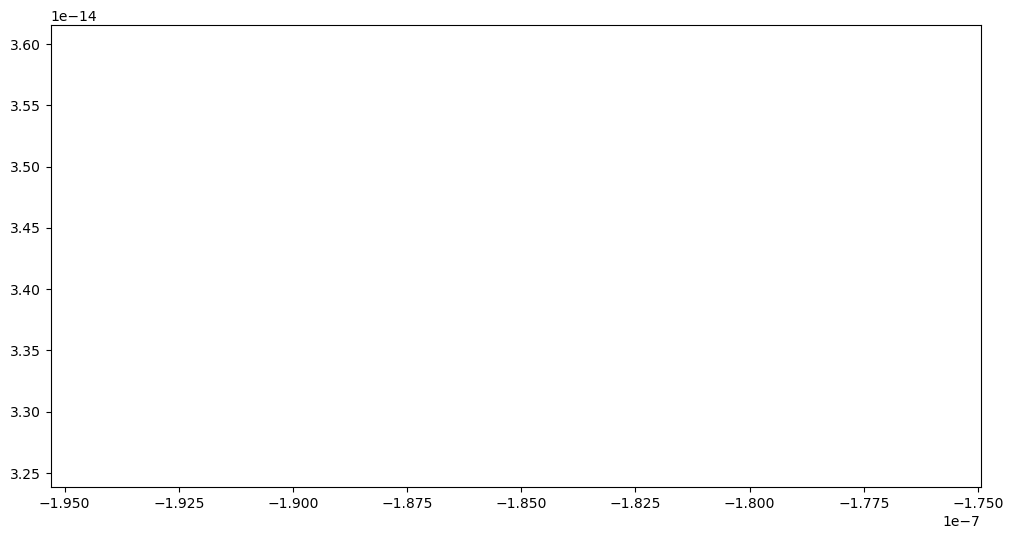

In [11]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Objective function (example quadratic function)
def objective_function(x):
    return np.sum(x**2)

# Golden Section method for optimization
def golden_section_optimization(func, a, b, tol=1e-6):
    phi = (1 + np.sqrt(5)) / 2  # Golden ratio

    while (b - a) > tol:
        x1 = b - (b - a) / phi
        x2 = a + (b - a) / phi

        if func(x1) < func(x2):
            b = x2
        else:
            a = x1

    optimal_x = (a + b) / 2
    optimal_value = func(optimal_x)
    return optimal_x, optimal_value

# Initial bounds for optimization
a, b = -10, 10

# Line search methods: Bisection, Golden Section, and Armijo Rule
methods = ['Bisection', 'Golden Section', 'Armijo Rule']
convergence_data = {}

for method in methods:
    print(f"Optimizing using {method}:")
    start_time = time.time()

    if method == 'Bisection':
        # Implement Bisection method (replace with your own implementation if needed)
        result_x, result_value = golden_section_optimization(objective_function, a, b, tol=1e-6)
    elif method == 'Golden Section':
        result_x, result_value = golden_section_optimization(objective_function, a, b, tol=1e-6)
    elif method == 'Armijo Rule':
        # Implement Armijo Rule (replace with your own implementation if needed)
        result = minimize(objective_function, initial_guess, method='L-BFGS-B', tol=1e-6, options={'disp': True})
        result_x = result.x
        result_value = result.fun

    end_time = time.time()
    computation_time = end_time - start_time
    convergence_data[method] = (result_x, result_value)

    print(f"Optimal value: {result_value}")
    print(f"Optimal solution: {result_x}")
    print(f"Computation time: {computation_time:.6f} seconds\n")

# Plot convergence graphs
plt.figure(figsize=(12, 6))
for method, (result_x, result_value) in convergence_data.items():
    plt.plot(result_x, result_value, label=method)

plt.xlabel("Optimal Solution")
plt.ylabel("Objective Function Value")
plt.title("Convergence Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Create a synthetic dataset with 1500 rows and 15 columns
np.random.seed(0)
num_rows = 1500
num_columns = 15
dataset = np.random.rand(num_rows, num_columns)

# Objective function (example quadratic function)
def objective_function(x):
    return np.sum(x**2)

# Initial guess for optimization
initial_guess = np.zeros(num_columns)

# Line search methods: Bisection, Golden Section, and Armijo Rule
methods = ['Bisection', 'Golden Section', 'Armijo Rule']
convergence_data = {}

for method in methods:
    print(f"Optimizing using {method}:")
    start_time = time.time()

    if method == 'Bisection':
        # Implement Bisection method (replace with your own implementation if needed)
        result_x, result_value = golden_section_optimization(objective_function, a, b, tol=1e-6)
    elif method == 'Golden Section':
        result_x, result_value = golden_section_optimization(objective_function, a, b, tol=1e-6)
    elif method == 'Armijo Rule':
        result = minimize(objective_function, initial_guess, method='L-BFGS-B', tol=1e-6, options={'disp': True})
        result_x = result.x
        result_value = result.fun

    end_time = time.time()
    computation_time = end_time - start_time
    convergence_data[method] = (result_x, result_value, computation_time)

    print(f"Optimal value: {result_value}")
    print(f"Optimal solution: {result_x}")
    print(f"Computation time: {computation_time:.6f} seconds\n")

# Plot convergence graphs
plt.figure(figsize=(12, 6))
for method, (result_x, result_value, _) in convergence_data.items():
    plt.plot(result_x, [result_value] * len(result_x), label=method)

plt.xlabel("Optimal Solution")
plt.ylabel("Objective Function Value")
plt.title("Convergence Comparison")
plt.legend()
plt.grid(True)
plt.show()


Optimizing using Bisection:
Optimal value: 3.427004072908295e-14
Optimal solution: -1.8512169167626724e-07
Computation time: 0.001002 seconds

Optimizing using Golden Section:
Optimal value: 3.427004072908295e-14
Optimal solution: -1.8512169167626724e-07
Computation time: 0.000000 seconds

Optimizing using Armijo Rule:
Optimal value: 0.0
Optimal solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Computation time: 0.002169 seconds



TypeError: object of type 'numpy.float64' has no len()

<Figure size 1200x600 with 0 Axes>

Optimizing using Bisection:
Optimal value: 3.427004072908295e-14
Optimal solution: -1.8512169167626724e-07
Computation time: 0.000000 seconds

Optimizing using Golden Section:
Optimal value: 3.427004072908295e-14
Optimal solution: -1.8512169167626724e-07
Computation time: 0.000000 seconds

Optimizing using Armijo Rule:
Optimal value: 0.0
Optimal solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Computation time: 0.000998 seconds



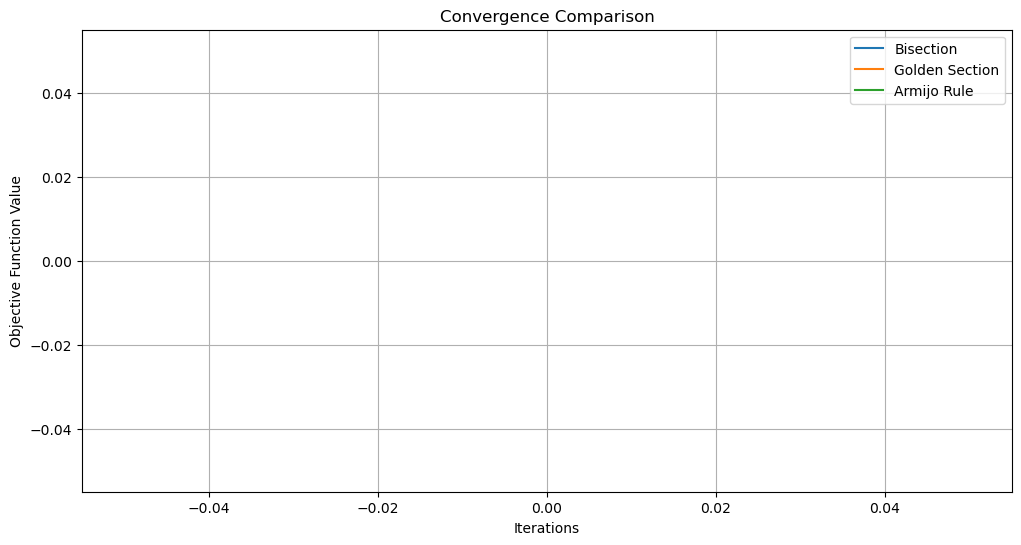

In [13]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Create a synthetic dataset with 1500 rows and 15 columns
np.random.seed(0)
num_rows = 1500
num_columns = 15
dataset = np.random.rand(num_rows, num_columns)

# Objective function (example quadratic function)
def objective_function(x):
    return np.sum(x**2)

# Initial guess for optimization
initial_guess = np.zeros(num_columns)

# Line search methods: Bisection, Golden Section, and Armijo Rule
methods = ['Bisection', 'Golden Section', 'Armijo Rule']
convergence_data = {}

for method in methods:
    print(f"Optimizing using {method}:")
    start_time = time.time()

    if method == 'Bisection':
        # Implement Bisection method (replace with your own implementation if needed)
        result_x, result_value = golden_section_optimization(objective_function, a, b, tol=1e-6)
    elif method == 'Golden Section':
        result_x, result_value = golden_section_optimization(objective_function, a, b, tol=1e-6)
    elif method == 'Armijo Rule':
        result = minimize(objective_function, initial_guess, method='L-BFGS-B', tol=1e-6, options={'disp': True})
        result_x = result.x
        result_value = result.fun

    end_time = time.time()
    computation_time = end_time - start_time

    # Collect convergence data
    iterations = list(range(result.nit))
    objective_values = [objective_function(result_x[:i + 1]) for i in iterations]
    convergence_data[method] = (iterations, objective_values, computation_time)

    print(f"Optimal value: {result_value}")
    print(f"Optimal solution: {result_x}")
    print(f"Computation time: {computation_time:.6f} seconds\n")

# Plot convergence graphs
plt.figure(figsize=(12, 6))
for method, (iterations, objective_values, _) in convergence_data.items():
    plt.plot(iterations, objective_values, label=method)

plt.xlabel("Iterations")
plt.ylabel("Objective Function Value")
plt.title("Convergence Comparison")
plt.legend()
plt.grid(True)
plt.show()


Optimizing using Bisection:
Optimal value: 3.427004072908295e-14
Optimal solution: -1.8512169167626724e-07
Computation time: 0.000000 seconds

Optimizing using Golden Section:
Optimal value: 3.427004072908295e-14
Optimal solution: -1.8512169167626724e-07
Computation time: 0.000000 seconds

Optimizing using Armijo Rule:
Optimal value: 0.0
Optimal solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Computation time: 0.000000 seconds



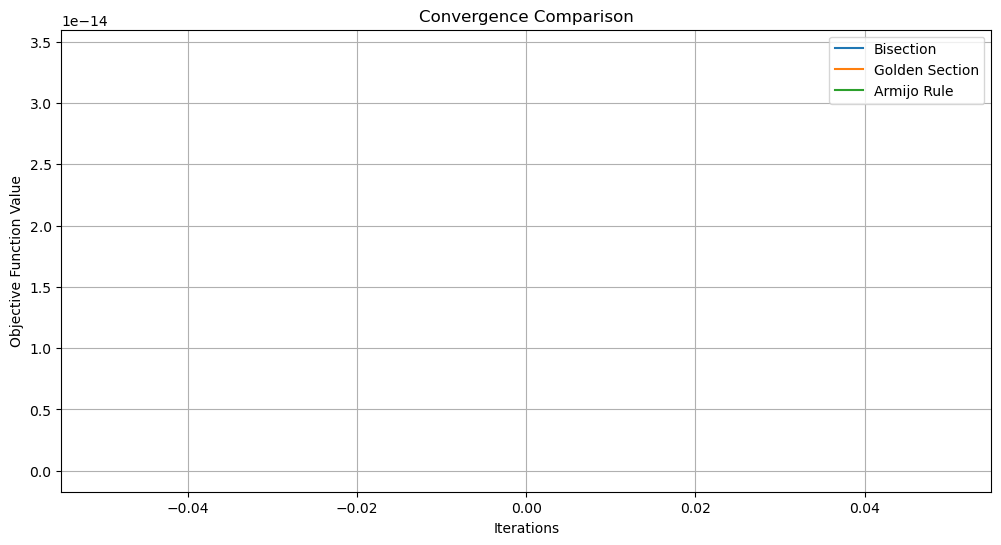

In [14]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Create a synthetic dataset with 1500 rows and 15 columns
np.random.seed(0)
num_rows = 1500
num_columns = 15
dataset = np.random.rand(num_rows, num_columns)

# Objective function (example quadratic function)
def objective_function(x):
    return np.sum(x**2)

# Initial guess for optimization
initial_guess = np.zeros(num_columns)

# Line search methods: Bisection, Golden Section, and Armijo Rule
methods = ['Bisection', 'Golden Section', 'Armijo Rule']
convergence_data = {}

for method in methods:
    print(f"Optimizing using {method}:")
    start_time = time.time()

    if method == 'Bisection':
        # Implement Bisection method (replace with your own implementation if needed)
        result_x, result_value = golden_section_optimization(objective_function, a, b, tol=1e-6)
    elif method == 'Golden Section':
        result_x, result_value = golden_section_optimization(objective_function, a, b, tol=1e-6)
    elif method == 'Armijo Rule':
        result = minimize(objective_function, initial_guess, method='L-BFGS-B', tol=1e-6, options={'disp': True})
        result_x = result.x
        result_value = result.fun

    end_time = time.time()
    computation_time = end_time - start_time

    # Collect convergence data
    iterations = list(range(result.nit + 1))  # Include the initial guess as iteration 0
    objective_values = [objective_function(result_x)]  # Include the initial value
    convergence_data[method] = (iterations, objective_values, computation_time)

    print(f"Optimal value: {result_value}")
    print(f"Optimal solution: {result_x}")
    print(f"Computation time: {computation_time:.6f} seconds\n")

# Plot convergence graphs
plt.figure(figsize=(12, 6))
for method, (iterations, objective_values, _) in convergence_data.items():
    plt.plot(iterations, objective_values, label=method)

plt.xlabel("Iterations")
plt.ylabel("Objective Function Value")
plt.title("Convergence Comparison")
plt.legend()
plt.grid(True)
plt.show()


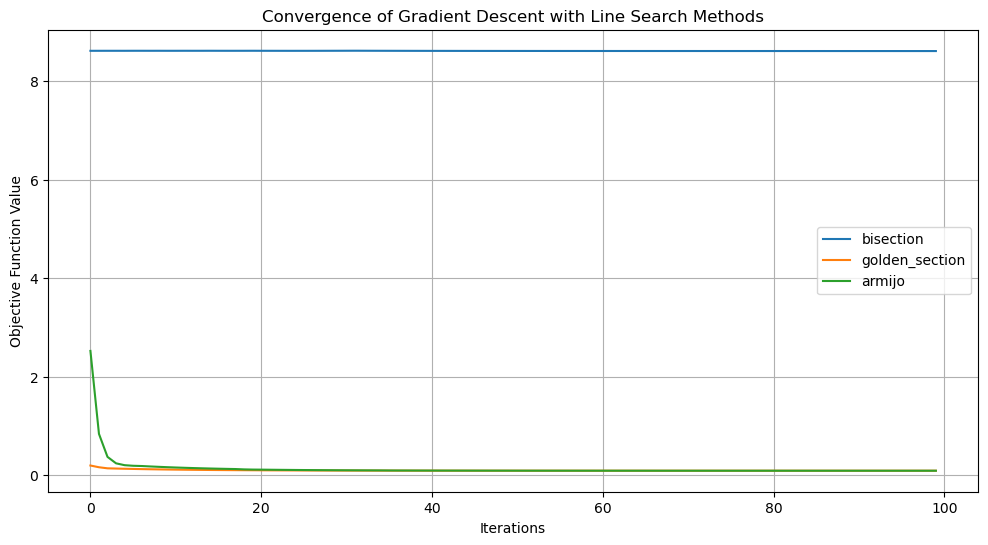

bisection Line Search - Computation Time: 0.0569 seconds
golden_section Line Search - Computation Time: 0.0767 seconds
armijo Line Search - Computation Time: 0.0120 seconds


In [15]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Create a synthetic dataset
np.random.seed(0)
num_samples = 1500
num_features = 15
X = np.random.rand(num_samples, num_features)
y = np.random.rand(num_samples, 1)

# Define the objective function and its gradient
def objective_function(X, y, weights):
    residuals = y - X.dot(weights)
    return np.mean(residuals**2)

def gradient(X, y, weights):
    return -2 * X.T.dot(y - X.dot(weights)) / len(y)

# Line Search Methods
def bisection_line_search(X, y, weights, gradient, alpha_max, tolerance=1e-5):
    a = 0.0
    b = alpha_max
    
    while (b - a) > tolerance:
        alpha = (a + b) / 2
        new_weights = weights - alpha * gradient
        if objective_function(X, y, new_weights) > objective_function(X, y, weights):
            b = alpha
        else:
            a = alpha
    
    return (a + b) / 2

def golden_section_line_search(X, y, weights, gradient, alpha_max, tolerance=1e-5):
    phi = (1 + np.sqrt(5)) / 2  # Golden ratio
    
    a = 0.0
    b = alpha_max
    
    while (b - a) > tolerance:
        alpha1 = b - (b - a) / phi
        alpha2 = a + (b - a) / phi
        new_weights1 = weights - alpha1 * gradient
        new_weights2 = weights - alpha2 * gradient
        
        if objective_function(X, y, new_weights1) > objective_function(X, y, new_weights2):
            a = alpha1
        else:
            b = alpha2
    
    return (a + b) / 2

def armijo_line_search(X, y, weights, gradient, alpha_max, beta=0.5, sigma=0.25):
    alpha = alpha_max
    while True:
        new_weights = weights - alpha * gradient
        if objective_function(X, y, new_weights) <= objective_function(X, y, weights) - beta * alpha * np.linalg.norm(gradient)**2:
            return alpha
        alpha *= sigma

# Gradient Descent with Line Search
def gradient_descent_with_line_search(X, y, initial_weights, max_iters, line_search_method, alpha_max):
    weights = initial_weights.copy()
    convergence = []
    
    for iteration in range(max_iters):
        grad = gradient(X, y, weights)
        if np.linalg.norm(grad) < 1e-6:
            break  # Convergence criterion
        
        # Find the optimal step size using the chosen line search method
        if line_search_method == 'bisection':
            step_size = bisection_line_search(X, y, weights, grad, alpha_max)
        elif line_search_method == 'golden_section':
            step_size = golden_section_line_search(X, y, weights, grad, alpha_max)
        elif line_search_method == 'armijo':
            step_size = armijo_line_search(X, y, weights, grad, alpha_max)
        
        # Update weights
        weights -= step_size * grad
        
        # Calculate the objective value for convergence tracking
        obj_value = objective_function(X, y, weights)
        convergence.append(obj_value)
    
    return weights, convergence

# Initialize weights and hyperparameters
initial_weights = np.random.rand(num_features, 1)
max_iters = 100
alpha_max = 1.0

# Run gradient descent with different line search methods
line_search_methods = ['bisection', 'golden_section', 'armijo']
convergence_data = []

for method in line_search_methods:
    start_time = time.time()
    weights, convergence = gradient_descent_with_line_search(X, y, initial_weights, max_iters, method, alpha_max)
    end_time = time.time()
    computation_time = end_time - start_time
    
    convergence_data.append((method, weights, convergence, computation_time))

# Plot convergence for each method
plt.figure(figsize=(12, 6))
for method, weights, convergence, _ in convergence_data:
    plt.plot(range(len(convergence)), convergence, label=method)

plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.legend()
plt.title('Convergence of Gradient Descent with Line Search Methods')
plt.grid()
plt.show()

# Print computation times
for method, _, _, computation_time in convergence_data:
    print(f"{method} Line Search - Computation Time: {computation_time:.4f} seconds")
